My Capstone Project - Assignment 9
Using a Kaggle Dataset | Medical Insurance Price Prediction

In [8]:
%cd /usr/Capstone project

/usr/Capstone project


In [10]:
!ls

'Medical Insurance Price Prediction.csv'


This project is based on the data from the Kaggle repository called Medical Insurance Price Prediction (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction/code).


# 1. Reading the dataset

In [11]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Medical Insurance Price Prediction.csv'  # Correct the file path
data = pd.read_csv(file_path)

# Removing duplicate rows if any
data = data.drop_duplicates()  # Update the data variable directly
print('Shape after deleting duplicate values:', data.shape)  # Use .shape to print the shape of the DataFrame

# Printing sample data
# Start observing the Quantitative/Qualitative/Categorical variables
print(data.head())

Shape after deleting duplicate values: (1337, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Observations:
1.	Age
* Range: Ages range from 18 to 64 years.
* Mean Age: The average age is approximately 39 years.

2.	BMI (Body Mass Index):
* Range: BMI values range from 15.96 to 53.13.
* Mean BMI: The average BMI is around 30.7, which classifies the average individual in the overweight to obese category.

3.	Children:
* Range: The number of children covered by health insurance ranges from 0 to 5.
* Average Number of Children: The average number of children is approximately 1.1 per policyholder

4.	Charges:
* Range: Charges vary significantly, from about $1,121.87 - $63,770.43.
* Mean Charges: The average insurance charge is around $13,261.37.
* Standard Deviation: There is a high variability in charges with it having a standard deviation of 12,151.77.

5.	Categorical Data:
*   Sex: Includes male and female categories.
*   Smoker: Indicates whether the individual smokes.
*   Region: Includes the geographic regions of southwest, southeast, northwest, and northeast.

# 2.	Problem statement definition

* To develop a predictive model for estimating individual medical insurance costs based on demographic and health-related factors.
* This analysis will specifically focus on determining the impact of age, Body Mass Index (BMI), smoking status, number of children, and geographic region on insurance charges.
The objectives are to identify critical predictors, construct a
* The objectives are to identify critical predictors, construct a predictive model using these factors, assess the model's accuracy, and offer actionable insights to insurance companies for premium assessment and risk management.



# 3.	Target variable identification
In the dataset, the target variable identified as 'charges' quantifies the total medical expenses covered by an insurance policy for an individual over a specific period.

# 4.	Visualising the distribution of the Target variable:

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


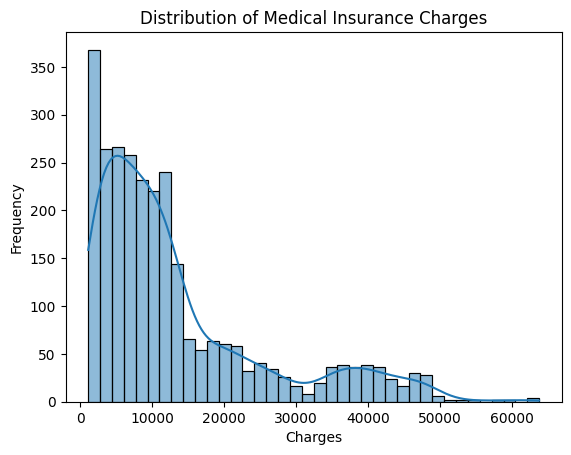

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Plotting the distribution of the target variable
sns.histplot(data['charges'], kde=True)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Insurance Charges')
plt.show()


# 5.	Data exploration at basic level

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Distribution of sex
sex
male      0.507215
female    0.492785
Name: proportion, dtype: float64

Distribution of smoker
smoker
no     0.796537
yes    0.203463
Name: proportion, dtype: float64

Distribution of region
region
southeast    0.276335
southwest    0.246753
northwest    0.239538
northeast    0.237374
Name: proportion, dtype: float64


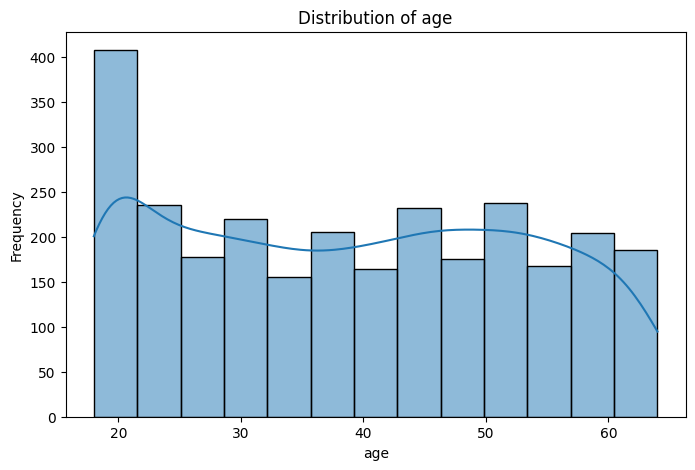

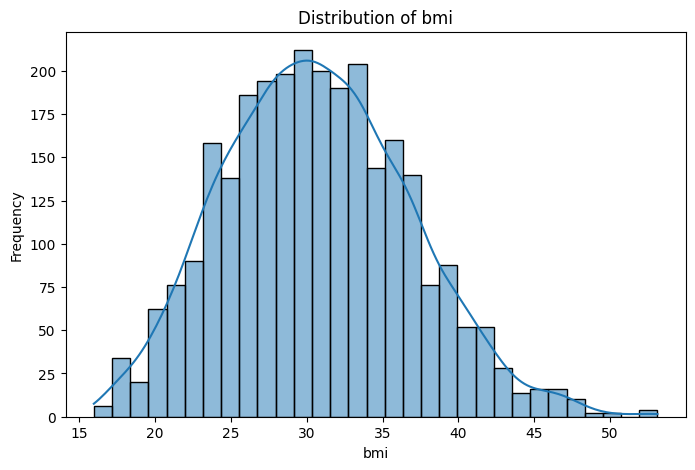

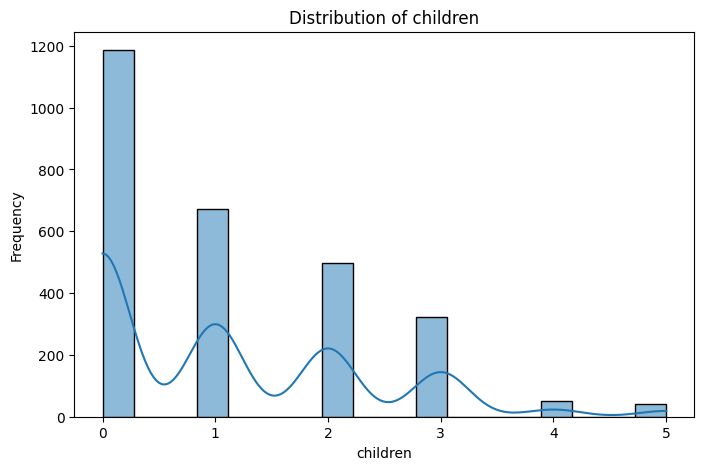

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Distribution of Categorical Variables
categorical_vars = ['sex', 'smoker', 'region']  # Specify categorical variables
for var in categorical_vars:
    print("\nDistribution of", var)
    print(data[var].value_counts(normalize=True))

# Distribution of Numerical Variables
numerical_vars = ['age', 'bmi', 'children']  # Specify numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()


## 6.	Identifying and Rejecting useless columns

**Correlation Matrix Analysis:**

The correlation matrix reveals several notable relationships between the variables and insurance charges. There is a moderately positive correlation of 0.43 between age and charges, indicating that as age increases, insurance charges also tend to rise. Similarly, BMI exhibits a positive correlation of 0.21 with charges, suggesting higher BMI values are associated with higher insurance costs. The number of children shows a weaker positive correlation of 0.07 with charges. This implies that having more children is linked to slightly higher insurance charges, though the relationship is not as strong as with age or BMI.

**Boxplot Analysis:**
1.   Charges by Sex:
The boxplots comparing charges between males and females significantly overlap with similar medians and distributions. This suggests that there is no significant difference in insurance charges based on sex alone. The boxplots comparing charges between males and females significantly overlap with similar medians and distributions. This suggests that there is no significant difference in insurance charges based on sex alone.
2.   Charges by Smoker Status:
The boxplot analysis for smoker status reveals a stark contrast. The median charge for smokers is significantly higher than for non-smokers, indicating that smoking is a major factor influencing insurance costs.

1.   Charges by Region:
The boxplot analysis for charges across different regions shows some variation. While certain regions may have slightly higher or lower median charges, the distributions overlap considerably. This suggests that region plays a relatively minor role in determining insurance charges compared to factors like smoking.








               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: floa

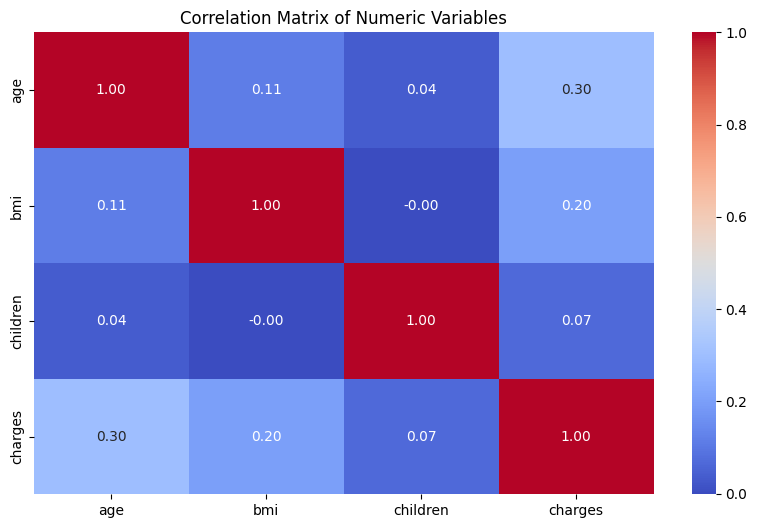

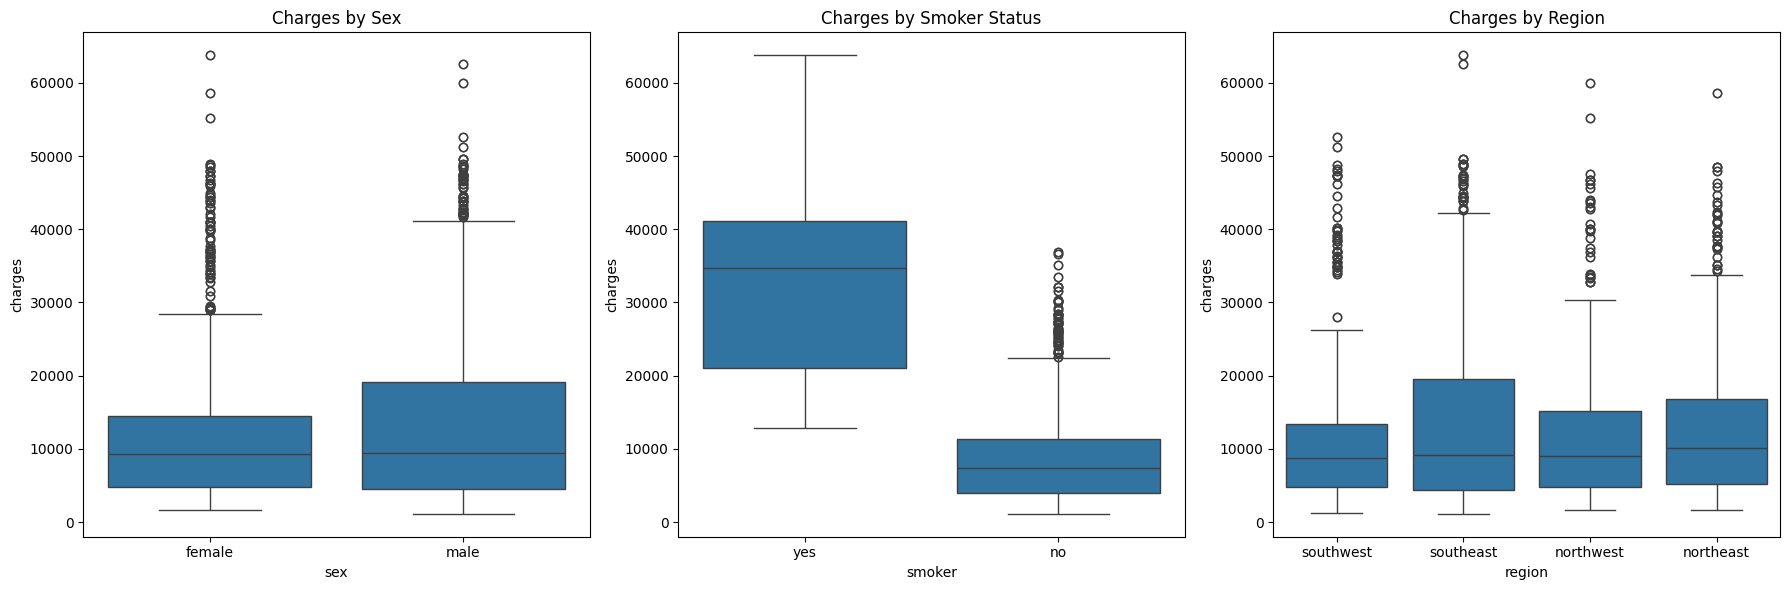

In [25]:
# Display basic statistics and information
print(data.describe())
print(data.info())

# Filter numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix for numeric variables
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Boxplots for categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Boxplot for Charges by Sex
sns.boxplot(x='sex', y='charges', data=data, ax=axes[0])
axes[0].set_title('Charges by Sex')

# Boxplot for Charges by Smoker Status
sns.boxplot(x='smoker', y='charges', data=data, ax=axes[1])
axes[1].set_title('Charges by Smoker Status')

# Boxplot for Charges by Region
sns.boxplot(x='region', y='charges', data=data, ax=axes[2])
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()


**Correlation Matrix Analysis:**

The correlation matrix reveals several notable relationships between the variables and insurance charges. There is a moderately positive correlation of 0.43 between age and charges, indicating that as age increases, insurance charges also tend to rise. Similarly, BMI exhibits a positive correlation of 0.21 with charges, suggesting higher BMI values are associated with higher insurance costs. The number of children shows a weaker positive correlation of 0.07 with charges. This implies that having more children is linked to slightly higher insurance charges, though the relationship is not as strong as with age or BMI.

**Boxplot Analysis:**
1.   Charges by Sex:
The boxplots comparing charges between males and females significantly overlap with similar medians and distributions. This suggests that there is no significant difference in insurance charges based on sex alone. The boxplots comparing charges between males and females significantly overlap with similar medians and distributions. This suggests that there is no significant difference in insurance charges based on sex alone.
2.   Charges by Smoker Status:
The boxplot analysis for smoker status reveals a stark contrast. The median charge for smokers is significantly higher than for non-smokers, indicating that smoking is a major factor influencing insurance costs.

1.   Charges by Region:
The boxplot analysis for charges across different regions shows some variation. While certain regions may have slightly higher or lower median charges, the distributions overlap considerably. This suggests that region plays a relatively minor role in determining insurance charges compared to factors like smoking.

# 7.	Visual Exploratory Data Analysis of data

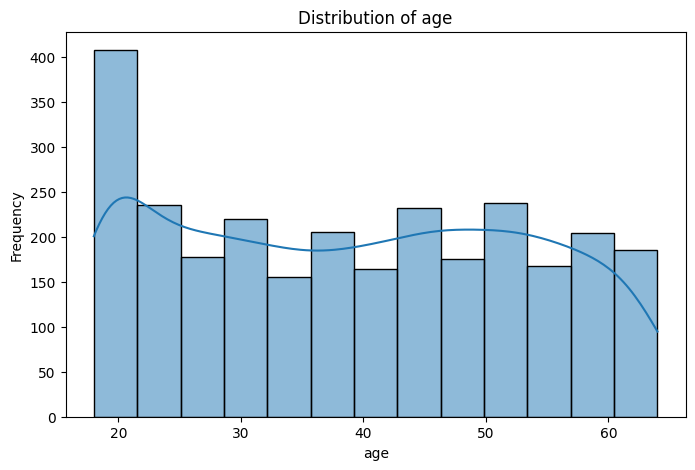

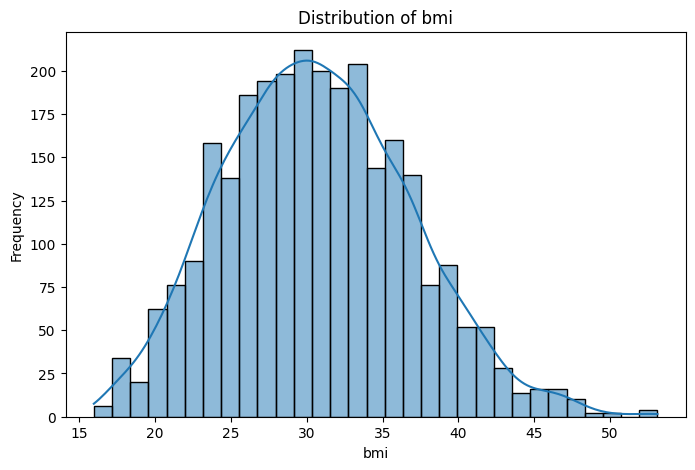

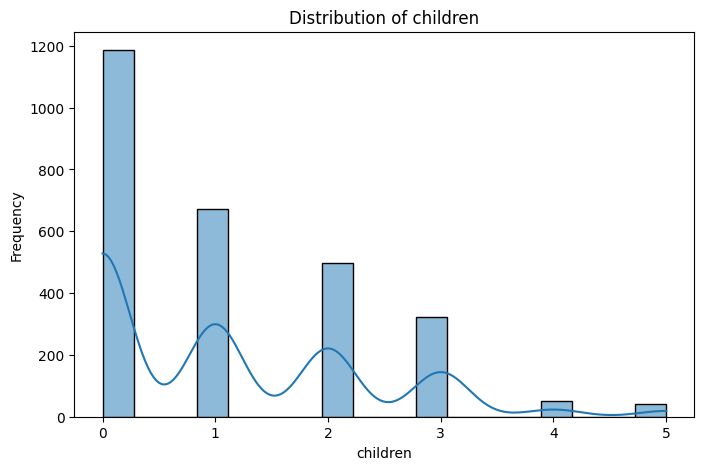

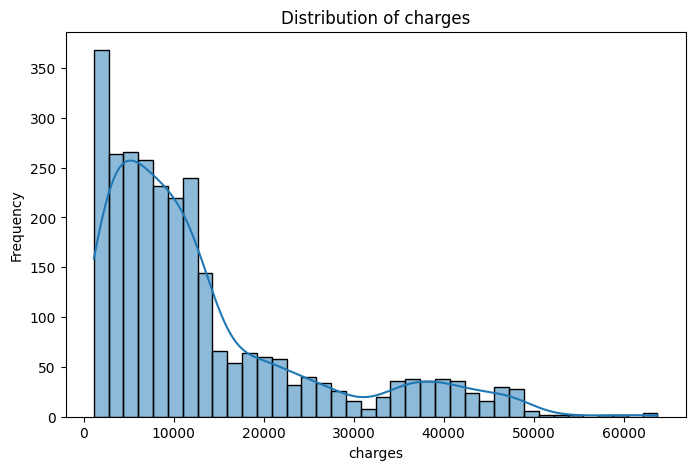

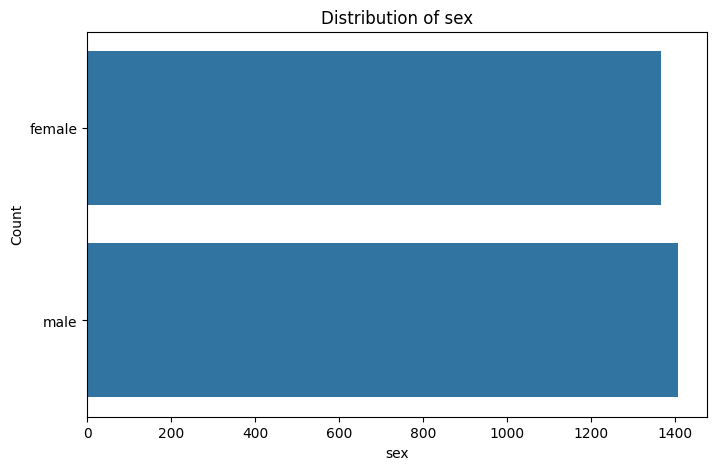

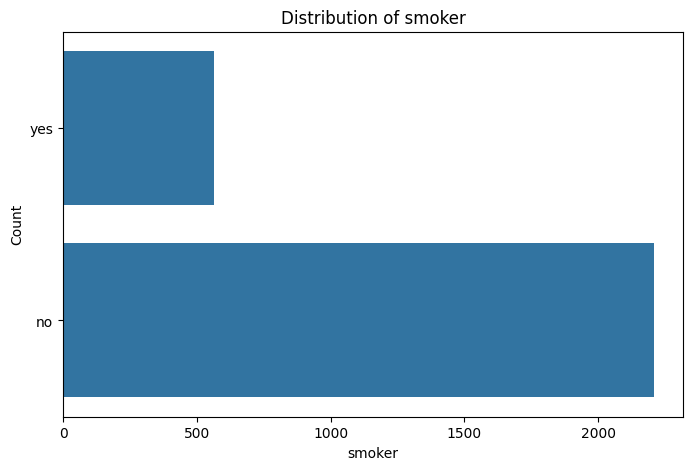

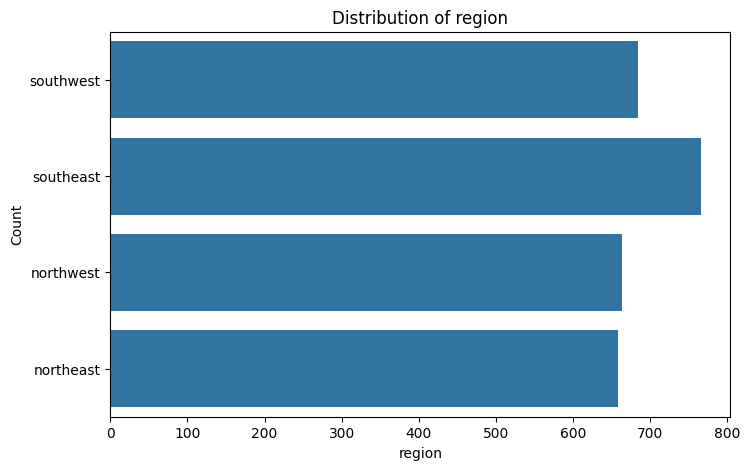

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Numerical variables: Histograms
numerical_vars = ['age', 'bmi', 'children', 'charges']  # Specify numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

# Categorical variables: Bar charts
categorical_vars = ['sex', 'smoker', 'region']  # Specify categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[var])
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var}')
    plt.show()


# 8.	Feature Selection based on data distribution
* Age has the highest importance (about 54.5%), indicating it is the most significant predictor of insurance charges in your model.
* BMI is also a key factor, with about 39.8% importance, showing it strongly affects the insurance cost predictions.
* Region has a moderate impact on the predictions with about 5.7% importance.


In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('/content/Medical Insurance Price Prediction.csv')

# Ensure all columns are numeric and handle potential non-numeric entries
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

# Convert categorical data to numeric
label_encoder = LabelEncoder()
data['smoker'] = label_encoder.fit_transform(data['smoker'])  # Encoding 'smoker'
# Repeat for 'region' if it's also categorical and not yet encoded
data['region'] = label_encoder.fit_transform(data['region'])

# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate IQR and filter outliers
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
data = data[~is_outlier.any(axis=1)]

# Split data into features and target
X = data[['age', 'bmi', 'region']]
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = pd.DataFrame(importances, index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)

# Predict and evaluate the model
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')
print(features)



RMSE: 3327.2960295844478
        importance
age       0.544753
bmi       0.398895
region    0.056352


---
Smoking and the Impact it has on Medical Insurance

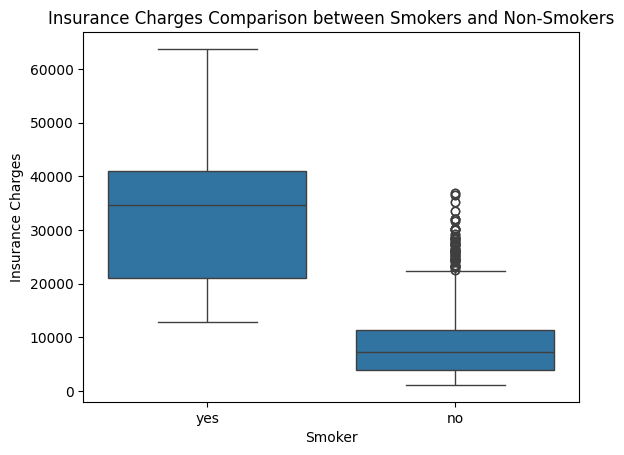

T-test Results:
T-statistic: nan
P-value: nan


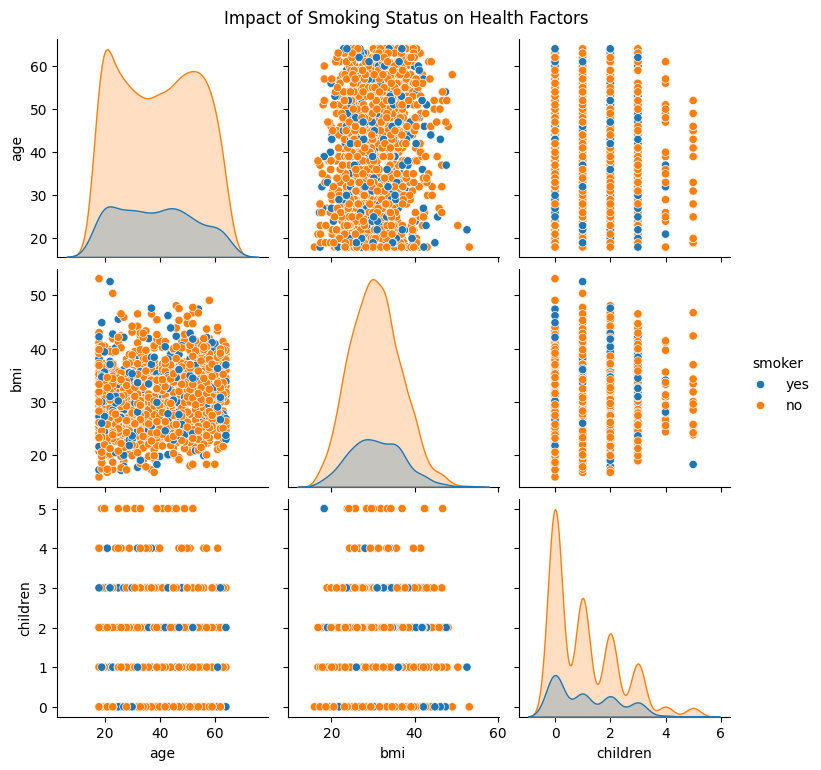

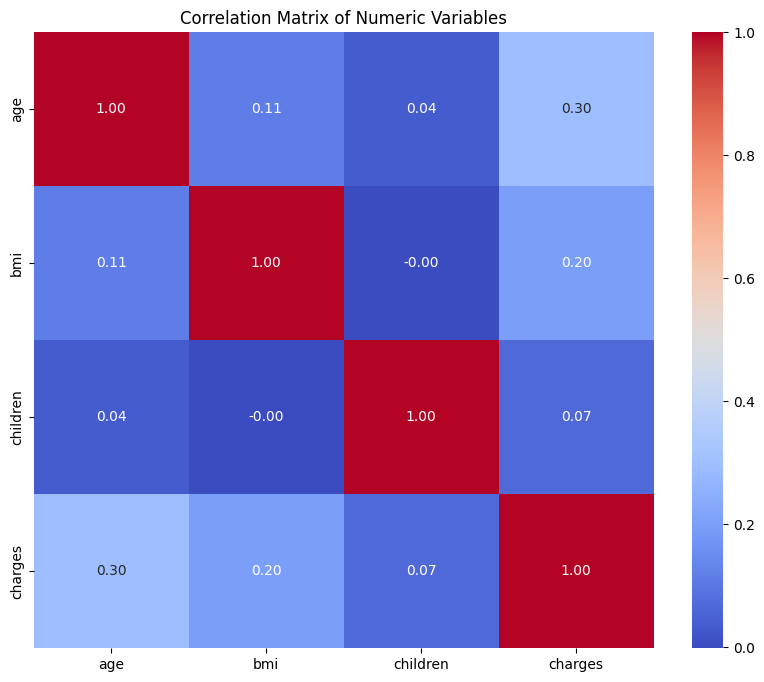

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load data
data = pd.read_csv('/content/Medical Insurance Price Prediction.csv')

# Ensure all columns are numeric and handle potential non-numeric entries
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Box plot comparing insurance charges between smokers and non-smokers
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges Comparison between Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

# Conduct a t-test to determine if the differences are statistically significant
smoker_charges = data[data['smoker'] == 1]['charges']
non_smoker_charges = data[data['smoker'] == 0]['charges']
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)
print("T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Scatter plots to investigate correlation between smoking status and other health factors
sns.pairplot(data, hue='smoker', vars=['age', 'bmi', 'children'])
plt.suptitle('Impact of Smoking Status on Health Factors', y=1.02)
plt.show()

# Correlation matrix to assess correlations between numeric variables
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


# 9.	Removal of outliers and missing values

In [47]:
import pandas as pd
import numpy as np  # Make sure to import numpy

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Check data types
print(data.dtypes)

# Select only numeric columns for operations like quantile calculation
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate quantiles for numeric columns only
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers using IQR
is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
data_cleaned = data[~is_outlier.any(axis=1)]

# Optionally print or view the cleaned data to confirm it's been processed
print(data_cleaned.head())


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# 10.	Visual and Statistic Correlation analysis for selection of best features

Statistical Analysis Recommendations:
1.	Use of Age and BMI: Given their positive correlations with charges, age and BMI should be considered in any predictive modelling. Age, with a higher correlation, might be weighed more heavily.
2.	Reconsider Children as a Feature: Due to its low correlation with charges, the number of children as a predictor in a model should be reconsidered. Including it in initial models might be beneficial to assess its practical impact before deciding on its final inclusion.
3.	Potential Non-linear Relationships: While correlation coefficients provide insights into linear relationships, the patterns observed in scatter plots (especially for BMI) suggest that there might be non-linear relationships. These could be further explored using polynomial features or non-linear models.

Further Statistical Tests:


1. ANOVA (Analysis of Variance): For categorical predictors not included in this correlation analysis, such as smoker status and region, conducting ANOVA could help determine if there are statistically significant differences in charges across different categories, which could inform their inclusion as predictors.
2. Advanced Modeling: Consider regression models that can incorporate interaction terms and non-linear relationships to capture better the dynamics observed in scatter plots.

Conclusion:
Based on this analysis, age and BMI emerge as significant predictors of medical insurance charges. Further exploration of non-linear modelling techniques and additional testing for categorical variables could refine the feature selection process, ensuring a robust predictive model.


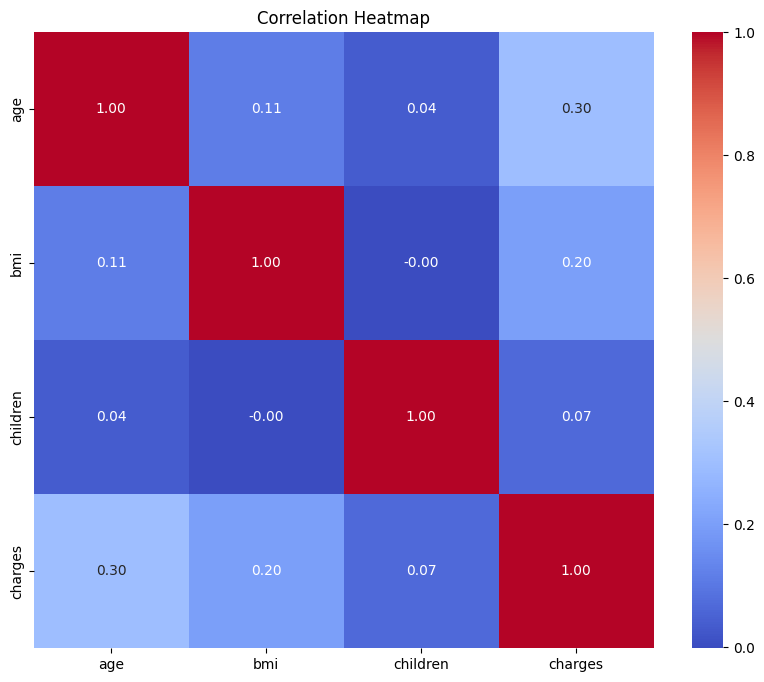

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import numpy

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Select only numeric columns before calculating the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Ensures only numeric columns are considered

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Ensure that any further code uses numeric_data for analyses involving numerical operations


# Observations:
•	Age: Shows a moderate positive correlation with charges (0.30). As age increases, charges also tend to increase, which aligns with the general knowledge that older individuals typically incur higher medical costs.

•	BMI: Displays a somewhat positive correlation with charges (0.20). This indicates that higher BMI values, often linked with more significant health risks, are associated with increased insurance costs.

•	Children: The correlation coefficient with charges is very low (0.07). This implies that the number of children is not a strong predictor of insurance charges in this dataset.


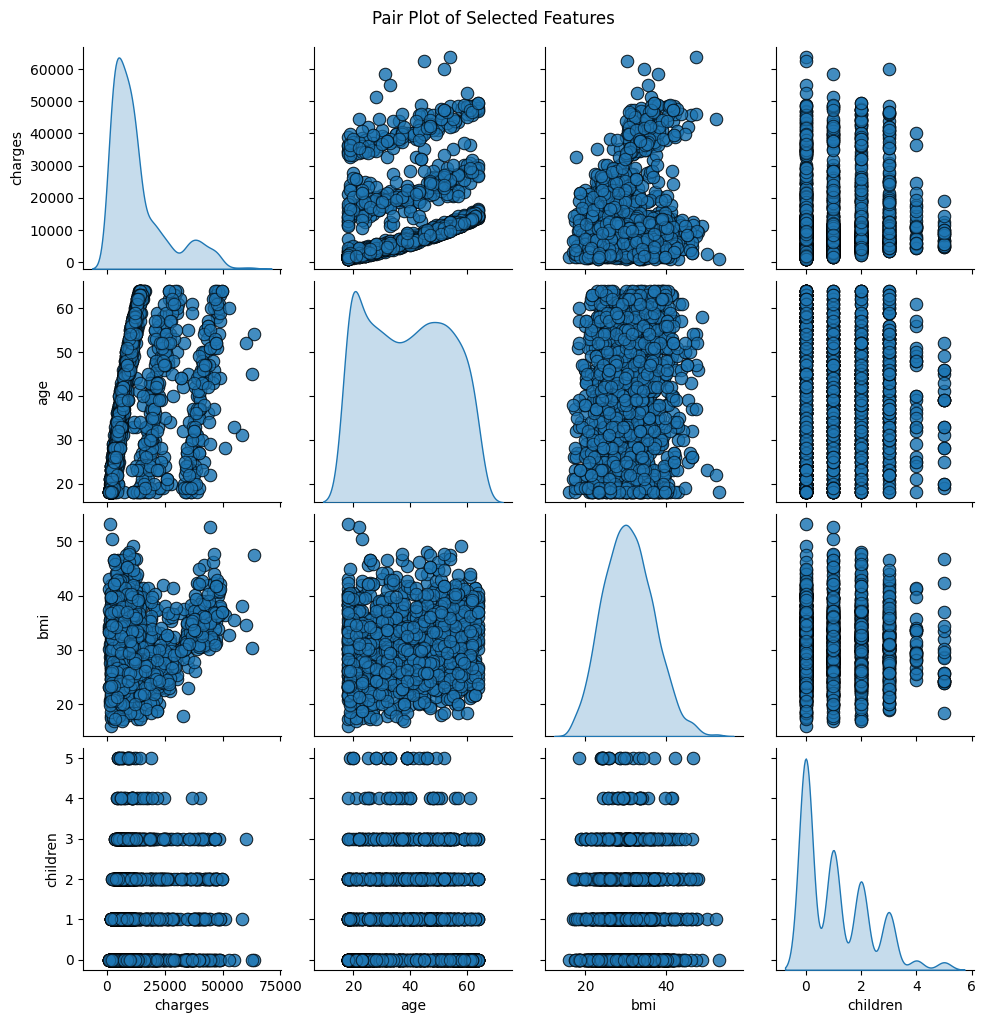

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Select only numeric columns before using them in visualizations
numeric_data = data.select_dtypes(include=[np.number])

# Generate pair plots for selected features including 'charges'
pair_plot = sns.pairplot(numeric_data[['charges', 'age', 'bmi', 'children']], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
pair_plot.fig.suptitle('Pair Plot of Selected Features', y=1.02)  # Adjust title positioning if needed
plt.show()


# 11.	Data Conversion to numeric values for machine learning/predictive analysis

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Handle missing values
data.loc[data['sex'].isnull(), 'sex'] = 'Missing'
data.loc[data['smoker'].isnull(), 'smoker'] = 'Missing'
data.loc[data['region'].isnull(), 'region'] = 'Missing'

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert 'sex' and 'smoker' to numeric values using label encoder
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Convert 'region' to dummy variables and drop the first to avoid multicollinearity
region_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True)
data = pd.concat([data, region_dummies], axis=1)
data.drop('region', axis=1, inplace=True)

# Scale numeric features: 'age', 'bmi', 'charges'
scaler = StandardScaler()
data[['age', 'bmi', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'charges']])

# Print the first few rows of the transformed data to verify changes
print(data.head())

# Optionally, save the processed data to a new CSV file for further use
output_path = r'C:\Users\Admin\OneDrive\Desktop\Processed Medical Insurance Data.csv'
data.to_csv(output_path, index=False)

        age  sex       bmi  children  smoker   charges  region_northwest  \
0 -1.428353    0 -0.457114         0       1  0.298245             False   
1 -1.499381    1  0.500731         1       0 -0.949483             False   
2 -0.789099    1  0.375085         3       0 -0.725285             False   
3 -0.433959    1 -1.304814         0       0  0.717976              True   
4 -0.504987    1 -0.297201         0       0 -0.773238              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


# 12.	Training/Testing Sampling and K-fold cross validation



Training and testing sets for model evaluation

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure that you are loading the dataset correctly
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# If 'charges' is indeed your target variable and you are sure it exists in your DataFrame, proceed to split
if 'charges' in data.columns:
    X = data.drop('charges', axis=1)  # Features
    y = data['charges']  # Target variable

    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training set size:", X_train.shape[0])
    print("Testing set size:", X_test.shape[0])
else:
    print("The column 'charges' does not exist in your DataFrame.")


Training set size: 2217
Testing set size: 555




---


K-fold cross-validation to assess model performance and generalization

Text(0.5, 0, 'Fold Number')

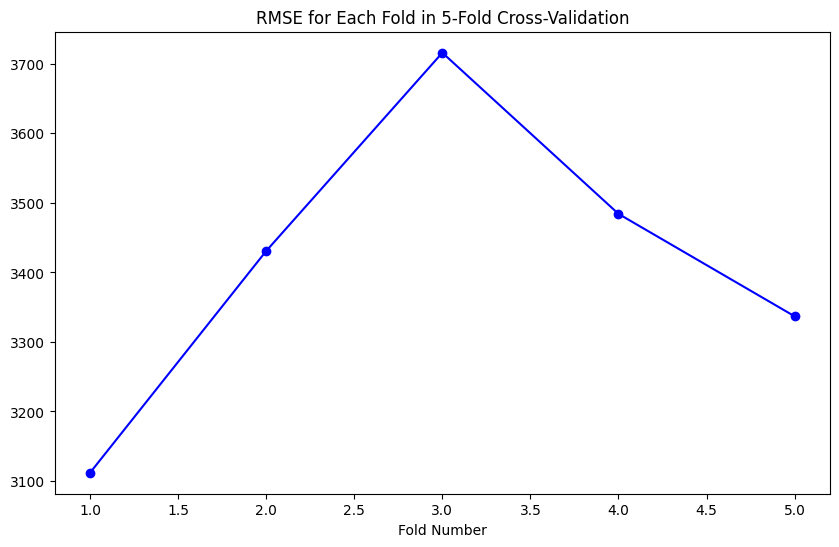

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'/content/Medical Insurance Price Prediction.csv'
data = pd.read_csv(file_path)

# Handle categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Splitting the dataset into features and the target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Setup K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_results)

# Plotting the RMSE scores for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='b')
plt.title('RMSE for Each Fold in 5-Fold Cross-Validation')
plt.xlabel('Fold Number')

---
Examining the distribution of features within each fold:

Model Consistency: The variation in RMSE values across different folds indicates that the model's performance is not consistent across different subsets of the dataset.


Fold 1: RMSE = 2769.821603447712
Fold 2: RMSE = 2650.7221992520895
Fold 3: RMSE = 2368.591419864207
Fold 4: RMSE = 2669.340319873818
Fold 5: RMSE = 2562.538359084653


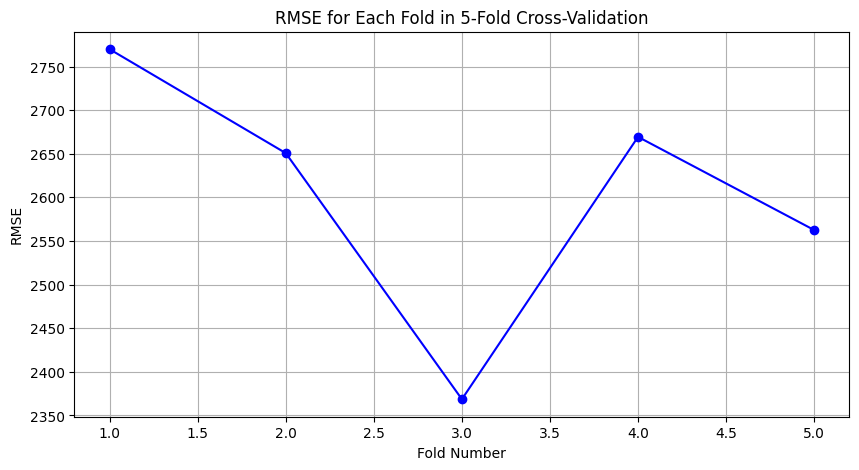

In [57]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Correcting the file path using a raw string
try:
    data = pd.read_csv(r'/content/Medical Insurance Price Prediction.csv')
except FileNotFoundError:
    print("The specified file was not found.")
    exit()

# Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['sex', 'smoker', 'region']  # update this list based on your dataset
data = pd.get_dummies(data, columns=categorical_columns)

# Define features and target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 0
results = []

for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Collect data characteristics (optional)
    data_distribution = X_test.describe().to_dict()

    # Store results
    results.append({'fold': fold, 'rmse': rmse, 'data_distribution': data_distribution})

# Print RMSE for each fold
for result in results:
    print(f"Fold {result['fold']}: RMSE = {result['rmse']}")

# Extract RMSE values for plotting
rmse_values = [result['rmse'] for result in results]

# Create a plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE for Each Fold in 5-Fold Cross-Validation')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


# 13.	Investigating multiple Regression algorithms


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load and prepare your data
data = pd.read_csv(r'/content/Medical Insurance Price Prediction.csv')
data = pd.get_dummies(data)  # One-hot encode categorical variables
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results[name] = rmse
    print(f"{name}: RMSE = {rmse}")

best_model = min(results, key=results.get)
print(f"Best performing model: {best_model} with RMSE = {results[best_model]}")

if best_model == 'Random Forest':
    param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-grid_search.best_score_)
    print(f"Optimized Random Forest RMSE: {best_rmse} with parameters: {best_params}")


Linear Regression: RMSE = 6319.271678607549
Ridge Regression: RMSE = 6319.6711649466015
Lasso Regression: RMSE = 6319.375865815053
Random Forest: RMSE = 2716.180826035437
Gradient Boosting: RMSE = 4388.205069716184
Best performing model: Random Forest with RMSE = 2716.180826035437
Optimized Random Forest RMSE: 3200.5103451442715 with parameters: {'max_depth': 20, 'n_estimators': 300}


**Linear Regression: RMSE = 6319.271678607549**

This value for Linear Regression suggests that on average, the model's predictions deviate from the actual values by about 6319.27. This indicates a relatively high error rate, suggesting that the model may not be capturing all the complexities of the dataset.

**Ridge Regression: RMSE = 6319.6711649466015**

Ridge Regression, which includes regularisation to prevent overfitting, shows a slightly higher RMSE than standard Linear Regression. The minimal increase in error suggests that for this dataset, Ridge regularisation does not significantly change the prediction accuracy, possibly due to a lack of overfitting issues or the model not being sensitive to the regularisation parameter.

**Lasso Regression: RMSE = 6319.375865815053**

Lasso Regression, another type of regularisation that can also perform feature selection by shrinking some coefficients to zero, shows a very similar RMSE to both Linear and Ridge Regression. This indicates that Lasso, like Ridge, doesn't provide a substantial improvement in model performance for this particular dataset.

**Random Forest: RMSE = 2716.180826035437**

The Random Forest model, which is an ensemble method using multiple decision trees to improve prediction accuracy, shows a significantly lower RMSE. An RMSE of 2716.18 suggests that Random Forest has much better prediction accuracy on this dataset compared to the linear models, likely benefiting from its ability to model non-linear relationships and interactions between features.

**Gradient Boosting: RMSE = 4388.205069716184**

Gradient Boosting, another ensemble technique that builds trees sequentially with each one correcting errors made by the previous trees, shows a better RMSE than the linear models but is not as effective as Random Forest. This RMSE value suggests that while Gradient Boosting improves upon linear approaches, it may not capture the dataset's complexities as effectively as Random Forest.

**Best performing model: Random Forest with RMSE = 2716.180826035437**

Among all the models tested, Random Forest has the lowest RMSE, making it the best performer for this dataset. This outcome highlights its effectiveness in handling the specific characteristics of the data, such as feature interactions and non-linearities.

# 14.	Selection of the best Model - Random Forest with RMSE
Investigate which features are most important in the Random Forest model.

Linear Regression: RMSE = 6319.27167860755
Ridge Regression: RMSE = 6320.058423329218
Random Forest: RMSE = 2750.443265558385


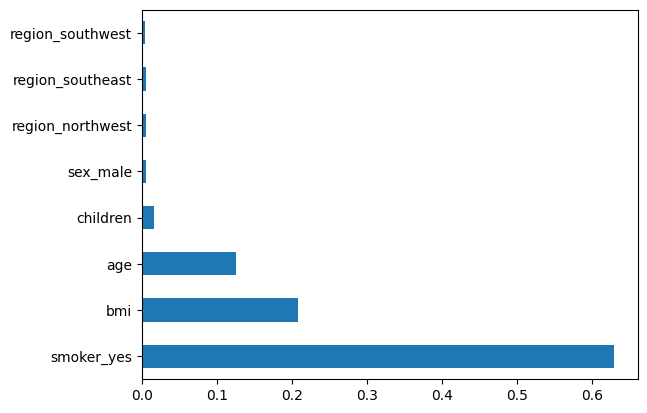

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv(r'/content/Medical Insurance Price Prediction.csv')

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'region', 'smoker'], drop_first=True)

X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results[name] = rmse

# Display results
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse}")

import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


# 15.	Deployment of the best model in production

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, fixed
import ipywidgets as widgets

# Load and preprocess data
def load_data(filepath):
    data = pd.read_csv(filepath)
    le = LabelEncoder()
    data['sex'] = le.fit_transform(data['sex'])
    data['smoker'] = le.fit_transform(data['smoker'])
    data['region'] = le.fit_transform(data['region'])
    return data

# Assuming data is already loaded as 'data'
filepath = '/content/Medical Insurance Price Prediction.csv'
data = load_data(filepath)

# Train model
def train_model(data):
    X = data.drop('charges', axis=1)
    y = data['charges']
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model

model = train_model(data)

def predict(age, sex, bmi, children, smoker, region):
    # Convert inputs to proper format
    sex = LabelEncoder().fit_transform([sex])[0]
    smoker = LabelEncoder().fit_transform([smoker])[0]
    region = LabelEncoder().fit_transform([region])[0]
    features = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
                            columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
    prediction = model.predict(features)
    return f'Estimated Insurance Charges: ${prediction[0]:.2f}'

# Create interactive UI
interact(predict,
         age=widgets.IntSlider(min=18, max=64, step=1, value=30),
         sex=widgets.Dropdown(options=['male', 'female']),
         bmi=widgets.FloatSlider(min=15, max=53, step=0.1, value=30),
         children=widgets.IntSlider(min=0, max=5, step=1, value=1),
         smoker=widgets.Dropdown(options=['yes', 'no']),
         region=widgets.Dropdown(options=['southwest', 'southeast', 'northwest', 'northeast']))


interactive(children=(IntSlider(value=30, description='age', max=64, min=18), Dropdown(description='sex', opti…

<function __main__.predict(age, sex, bmi, children, smoker, region)>